Consider the image shown 
(a) Apply gamma correction to the L plane in the L∗a∗b∗
color space and state the γ value.



Text(0.5, 1.0, 'Gamma Corrected Image (γ=1.40)')

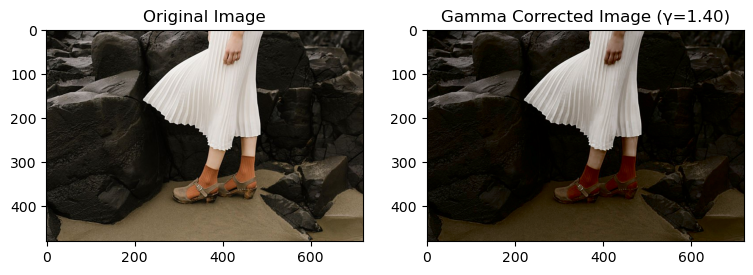

In [9]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np



# Load the original image
img_orig = cv.imread('images\highlights_and_shadows.jpg', cv.IMREAD_COLOR)
# Convert the image to LAB color space
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
# Apply gamma correction to the L channel
gamma = 1.4  
img_lab[:,:,0] = (((img_orig[:,:,0]/255)**gamma)*255).astype(np.uint8)
# Convert the image back to BGR color space
img_gamma = cv.cvtColor(img_lab, cv.COLOR_LAB2BGR)
# Create subplots
f, axarr = plt.subplots(1,2,figsize=(9,12))

# Display the original and gamma corrected images
axarr[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0].set_title("Original Image")
axarr[1].imshow(cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB))
axarr[1].set_title("Gamma Corrected Image (γ={:.2f})".format(gamma))


(b) Show the histograms of the original and corrected images.

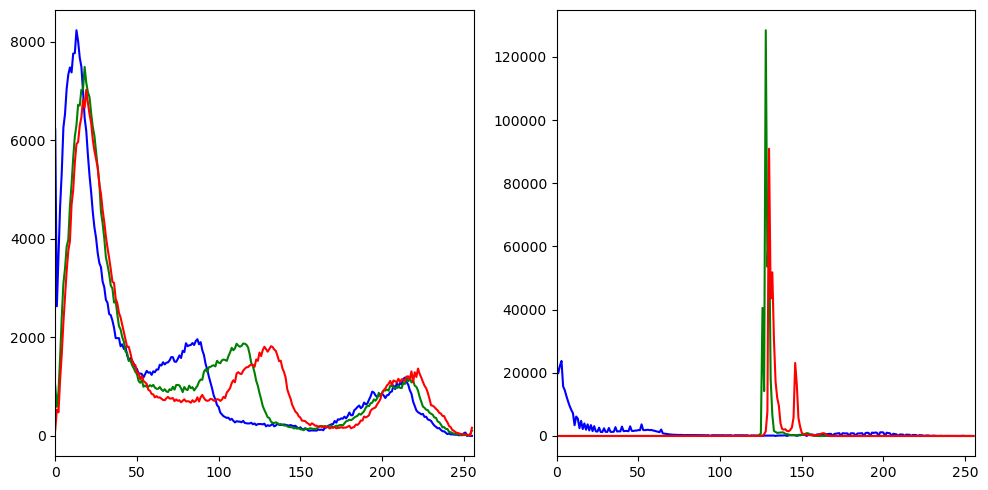

In [12]:
color=['b','g','r']
fig,ax=plt.subplots(1,2,figsize=(10,5))

for i,c in enumerate(color):
    hist=cv.calcHist([img_orig],[i],None,[256],[0,256]) 
    ax[0].plot(hist,color=c) 
    ax[0].set_xlim([0,256])

color=['b','g','r']
for i,c in enumerate(color):
    hist=cv.calcHist([img_lab],[i],None,[256],[0,256]) 
    ax[1].plot(hist,color=c) 
    ax[1].set_xlim([0,256])
plt.savefig('Q3-histogram.png')
plt.tight_layout()
plt.show()

Extra

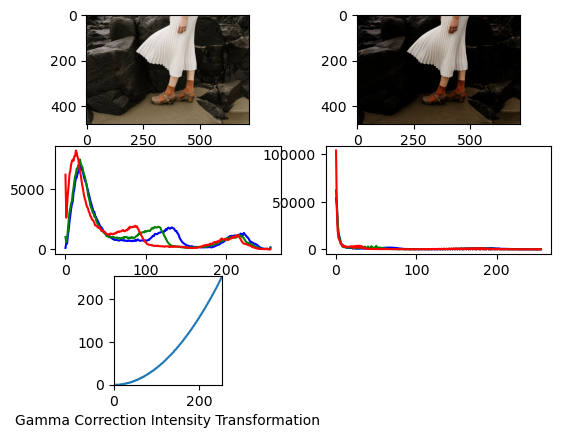

In [2]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
img_orig = cv.imread('images\highlights_and_shadows.jpg', cv.IMREAD_COLOR)

# Apply gamma correction
gamma = 2
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0, 256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)

# Convert images to RGB format
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

# Create subplots
f, axarr = plt.subplots(3, 2)

# Display the original and gamma corrected images
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)

# Plot histograms
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

# Plot the gamma correction table
axarr[2, 0].plot(table)
axarr[2,0].set_xlabel("Gamma Correction Intensity Transformation")
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

axarr[2, 1].axis('off')

# Show the plots
plt.show()
